In [180]:
import pandas as pd
import numpy as np
import numpy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

# Create the Stacked LSTM model
from tensorflow.keras.models import Sequentials
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

ImportError: ignored

In [181]:
!pip uninstall yfinance
!pip uninstall pandas-datareader
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas-datareader

Found existing installation: yfinance 0.1.67
Uninstalling yfinance-0.1.67:
  Would remove:
    /usr/local/bin/sample
    /usr/local/lib/python3.7/dist-packages/yfinance-0.1.67.dist-info/*
    /usr/local/lib/python3.7/dist-packages/yfinance/*
Proceed (y/n)? y
  Successfully uninstalled yfinance-0.1.67
Found existing installation: pandas-datareader 0.10.0
Uninstalling pandas-datareader-0.10.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_datareader-0.10.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_datareader/*
Proceed (y/n)? y
  Successfully uninstalled pandas-datareader-0.10.0
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [182]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','IBM','CERN','FB']

end = datetime.now()
start = datetime(2001,1,1)

In [183]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [184]:
company_list = [AAPL, GOOG, MSFT, AMZN, IBM, CERN, FB]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","IBM","CERNER","FACEBOOK"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-11-24,341.779999,332.809998,336.000000,341.059998,13566200.0,341.059998,FACEBOOK
2021-11-26,337.750000,331.899994,335.799988,333.119995,14750700.0,333.119995,FACEBOOK
2021-11-29,340.670013,335.309998,336.890015,338.029999,16650900.0,338.029999,FACEBOOK
2021-11-30,335.809998,323.429993,335.000000,324.459991,25390000.0,324.459991,FACEBOOK
2021-12-01,330.500000,310.290009,330.290009,310.600006,30329600.0,310.600006,FACEBOOK
2021-12-02,314.600006,307.200012,311.399994,310.390015,24396200.0,310.390015,FACEBOOK
2021-12-03,313.750000,299.500000,313.730011,306.839996,27448700.0,306.839996,FACEBOOK
2021-12-06,320.100006,306.339996,308.130005,317.869995,21758300.0,317.869995,FACEBOOK
2021-12-07,326.540009,321.000000,321.570007,322.809998,18794000.0,322.809998,FACEBOOK


In [185]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5268 entries, 2001-01-02 to 2021-12-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          5268 non-null   float64
 1   Low           5268 non-null   float64
 2   Open          5268 non-null   float64
 3   Close         5268 non-null   float64
 4   Volume        5268 non-null   float64
 5   Adj Close     5268 non-null   float64
 6   company_name  5268 non-null   object 
dtypes: float64(6), object(1)
memory usage: 329.2+ KB


In [186]:
df.shape

(33104, 7)

In [187]:
df.isna().sum()

High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33104 entries, 2001-01-02 to 2021-12-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          33104 non-null  float64
 1   Low           33104 non-null  float64
 2   Open          33104 non-null  float64
 3   Close         33104 non-null  float64
 4   Volume        33104 non-null  float64
 5   Adj Close     33104 non-null  float64
 6   company_name  33104 non-null  object 
dtypes: float64(6), object(1)
memory usage: 2.0+ MB


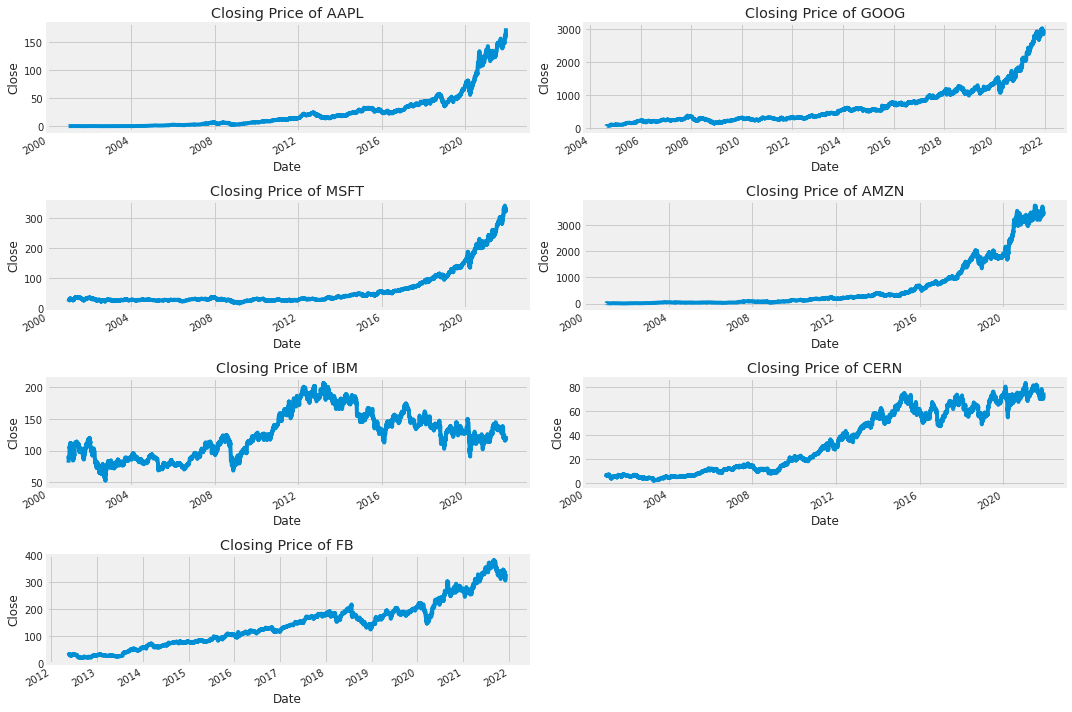

In [189]:
# historical view of the closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

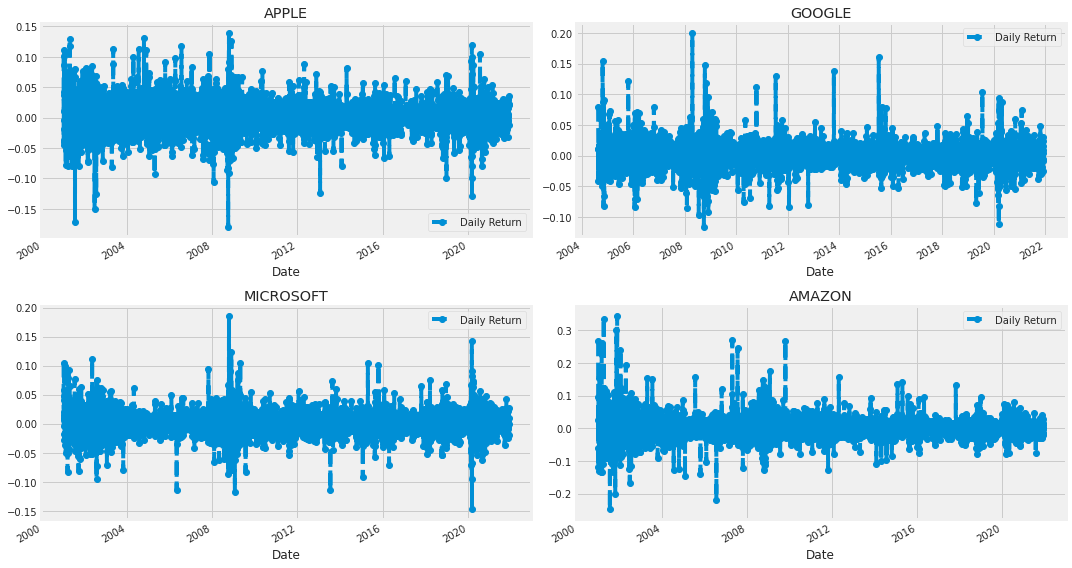

In [190]:
# using pct_change to find percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plotting daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

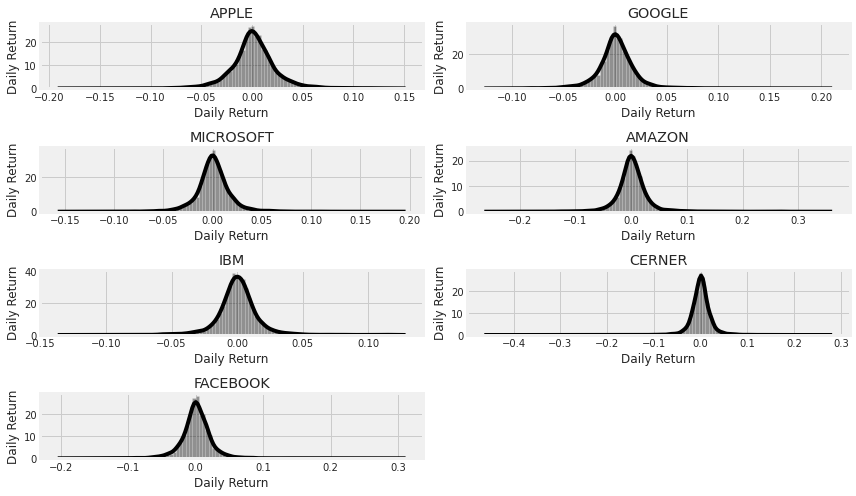

In [191]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='black')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# **Predicting the closing price stock price of Amazon**

In [192]:
data = DataReader('AMZN', data_source='yahoo', start='2020-01-01', end=datetime.now())

In [193]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971
...,...,...,...,...,...,...
2021-12-02,3492.699951,3423.750000,3460.000000,3437.360107,3236300,3437.360107
2021-12-03,3469.870117,3338.600098,3455.000000,3389.790039,4032600,3389.790039
2021-12-06,3473.909912,3338.689941,3393.000000,3427.370117,3443000,3427.370117


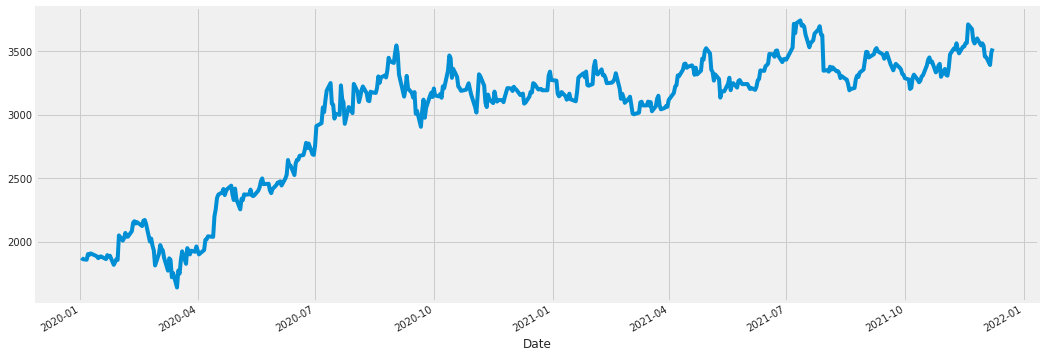

In [194]:
data['Open'].plot(figsize=(16,6))

In [195]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(data).reshape(-1,1))

In [196]:
df

array([[1.74730616e-05],
       [1.52977632e-05],
       [1.59948083e-05],
       ...,
       [1.21879071e-04],
       [1.37238257e-01],
       [1.21879071e-04]])

In [197]:
# splitting dataset into train and test split

X=int(len(df)*0.75)
y=len(df)-X

# Standarize dataset values to reduce loss
train_mean = df[:X].mean()
train_std = df[:X].std()

df = (df-train_mean)/train_std
train_data,test_data=df[0:X,:],df[X:len(df),:1]


In [198]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [199]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [200]:
print(X_train.shape), print(y_train.shape)

(2198, 1)
(2198,)


(None, None)

In [201]:
model=Sequential()
model.add(LSTM(512,activation='relu',return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [202]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [203]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
35/35 [==============================] - 7s 51ms/step - loss: 0.9855 - accuracy: 0.0000e+00 - val_loss: 0.5153 - val_accuracy: 0.0000e+00
Epoch 2/10
35/35 [==============================] - 1s 16ms/step - loss: 0.9728 - accuracy: 0.0000e+00 - val_loss: 0.5181 - val_accuracy: 0.0000e+00
Epoch 3/10
35/35 [==============================] - 1s 17ms/step - loss: 0.9710 - accuracy: 0.0000e+00 - val_loss: 0.5151 - val_accuracy: 0.0000e+00
Epoch 4/10
35/35 [==============================] - 1s 17ms/step - loss: 0.9706 - accuracy: 0.0000e+00 - val_loss: 0.5063 - val_accuracy: 0.0000e+00
Epoch 5/10
35/35 [==============================] - 1s 16ms/step - loss: 0.9699 - accuracy: 0.0000e+00 - val_loss: 0.5213 - val_accuracy: 0.0000e+00
Epoch 6/10
35/35 [==============================] - 1s 17ms/step - loss: 0.9692 - accuracy: 0.0000e+00 - val_loss: 0.5103 - val_accuracy: 0.0000e+00
Epoch 7/10
35/35 [==============================] - 1s 17ms/step - loss: 0.9694 - accuracy: 0.0000e+00 - v

In [204]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 512)          1052672   
                                                                 
 dropout_9 (Dropout)         (None, 100, 512)          0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 128)          328192    
                                                                 
 dropout_10 (Dropout)        (None, 100, 128)          0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

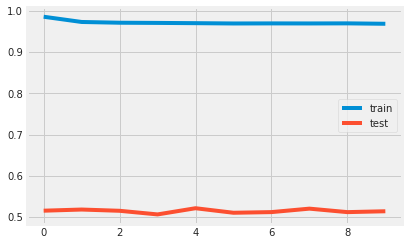

In [205]:
def loss_plot(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    
    return plt

loss_plot(history)

In [206]:
# Calculate original values
y_inv = (y_train*int(train_std))+int(train_mean)
ytest_inv = (y_test*int(train_std))+int(train_mean)

# Calculate predicted values
y_pred = model.predict(X_test)
ypred_inv = (y_pred*int(train_std))+int(train_mean)

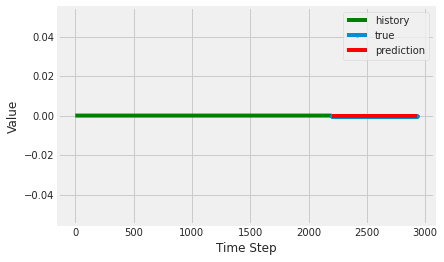

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [207]:
def full_plot(y_inv, ytest_inv, ypred_inv):
    plt.plot(np.arange(0, len(y_inv)), y_inv, 'g', label="history")
    plt.plot(np.arange(len(y_inv), len(y_inv) + len(ytest_inv)), ytest_inv, marker='.', label="true")
    plt.plot(np.arange(len(y_inv), len(y_inv) + len(ytest_inv)), ypred_inv, 'r', label="prediction")
    plt.ylabel('Value')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show()
    
    return plt

full_plot(y_inv, ytest_inv, ypred_inv)

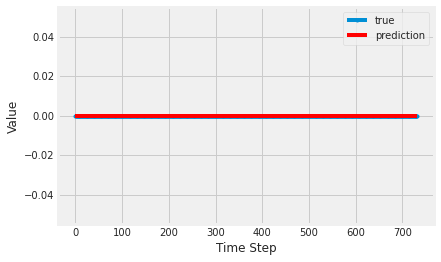

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [208]:
def compare_value_plot(y_inv, ytest_inv, ypred_inv):
    plt.plot(ytest_inv, marker='.', label="true")
    plt.plot(ypred_inv, 'r', label="prediction")
    plt.ylabel('Value')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show()
    
    return plt

compare_value_plot(y_inv, ytest_inv, ypred_inv)

### **Machine Learning Model #1**

In [209]:
# Machine Learning Model Regression #1
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [210]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [211]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [212]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print("Train Mean Squared Error: ", lr_train_mse)
print("Test Mean Squared Error: ", lr_test_mse)
print("Train R^2 Score: ", lr_train_r2)
print("Test R^2 Score: ", lr_test_r2)

Train Mean Squared Error:  0.9732790577882183
Test Mean Squared Error:  0.5177918021285669
Train R^2 Score:  0.02745920433075333
Test R^2 Score:  -0.0011735328155439984


In [213]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

print(lr_results)

              Method Training MSE Training R2  Test MSE     Test R2
0  Linear regression     0.973279   0.0274592  0.517792 -0.00117353


### **Machine Learning Model #2**

In [222]:
# Machine Learning Model Regression #2
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

#X_train, y_train = create_dataset(train_data, time_step)
#X_test, y_test = create_dataset(test_data, time_step)

In [215]:
lsvr = LinearSVR(verbose=0, dual=True)
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

LinearSVR()

In [216]:
lsvr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR()

In [219]:
lsvr_score_r2 = lsvr.score(X_train, y_train)
lsvr_score_cv = cross_val_score(lsvr, X_train, y_train, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [220]:
print("R^2 Score: ", lsvr_score_r2)
print("CV Mean Score: ", lsvr_score_cv.mean())

R^2 Score:  -0.16550800948546462
CV Mean Score:  -0.17648851876524163


In [229]:
# predicting model_2 & getting accuracy
lsvr_y_pred = lsvr.predict(X_test)

lsvr_mse = mean_squared_error(y_test, lsvr_y_pred)
lsvr_rmse = lsvr_mse*(1/2.0)

print("Mean Squared Error: ", lsvr_mse)
print("Root Mean Square Error: ", lsvr_rmse)

Mean Squared Error:  0.6062661262157404
Root Mean Square Error:  0.3031330631078702


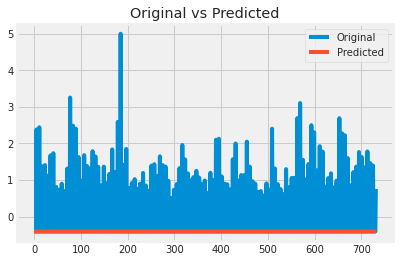

In [230]:
# plotting original vs predicted data
x_axis = range(len(y_test))
plt.plot(x_axis, y_test, label="Original")
plt.plot(x_axis, lsvr_y_pred, label="Predicted")
plt.title("Original vs Predicted")
plt.legend()
plt.show()